<a href="https://colab.research.google.com/github/shree-3143/Breast-Tumour-Type-Identifier/blob/main/Breast_Tumour_Type_Identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program detects breast cancer based off data.

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the data
from google.colab import files
uploaded = files.upload()
#using the Pandas library to read the CSV, and this data is stored in the variable "df"
df = pd.read_csv("breast_cancer.csv", sep=";") #sep=";" is a separator parameter to split the values in the columns, the default separator parameter is ","
df.head(7)

Saving breast_cancer.csv to breast_cancer (7).csv


,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnose
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0


In [ ]:
#count all the rows and columns in the dataset
df.shape

(683, 10)

In [ ]:
#count the number of empty values in each column
df.isna().sum()

clump_thickness                0
cell_size_uniformity           0
cell_shape_uniformity          0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
diagnose                       0
dtype: int64

In [ ]:
#get a count of the number of Malignant(M) or Benign (B) diagnoses
df["diagnose"].value_counts()

0    444
1    239
Name: diagnose, dtype: int64

[Text(0, 0, '444'), Text(0, 0, '239')]

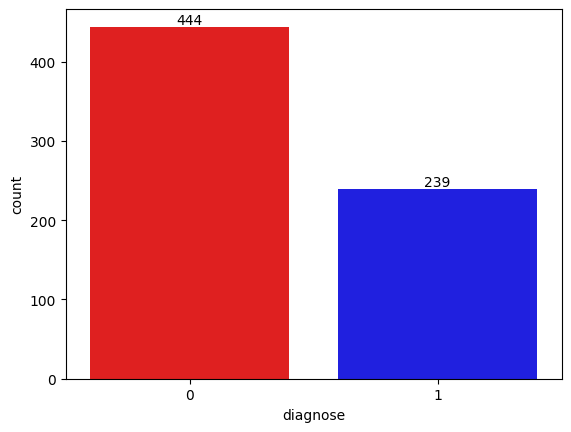

In [ ]:
#visualise the counts of the different diagnoses
graph = sns.countplot(x=df["diagnose"], palette=['#FF0000',"#0000FF"])
graph.bar_label(graph.containers[0]) #adds the count on top of the bar

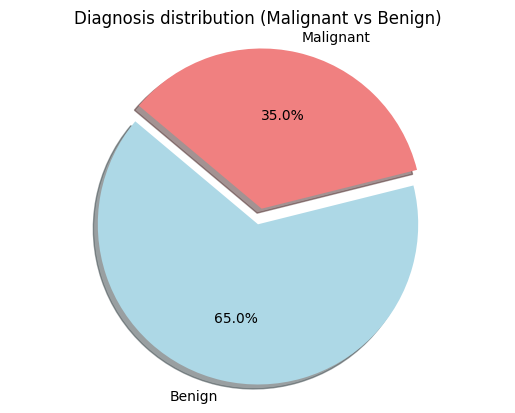

Number of Malignant: 239
Number of Benign: 444


In [ ]:
#creating a pie chart of the class distribution
B, M = df["diagnose"].value_counts()
sizes = [B, M]
labels = ["Benign", "Malignant"]
colours = ["lightblue", "lightcoral"]
explode = (0.1, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colours, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Diagnosis distribution (Malignant vs Benign)")
plt.show()

print(f"Number of Malignant: {M}")
print(f"Number of Benign: {B}")

In [ ]:
df.dtypes

clump_thickness                int64
cell_size_uniformity           int64
cell_shape_uniformity          int64
marginal_adhesion              int64
single_epithelial_cell_size    int64
bare_nuclei                    int64
bland_chromatin                int64
normal_nucleoli                int64
mitoses                        int64
diagnose                       int64
dtype: object

In [ ]:
#get the correlation of the columns
df.iloc[:,0:10].corr()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnose
clump_thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
cell_size_uniformity,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
cell_shape_uniformity,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
marginal_adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
single_epithelial_cell_size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
bare_nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
bland_chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
normal_nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
diagnose,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


<Axes: >

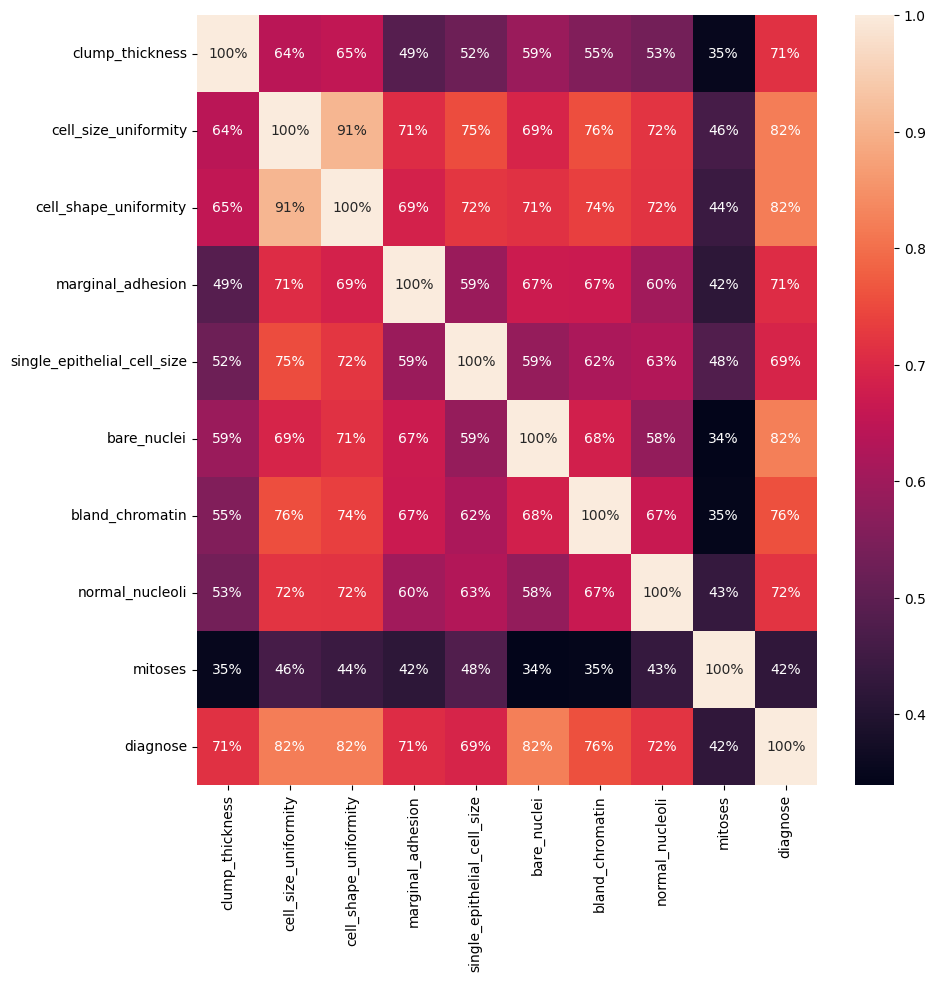

In [ ]:
#visualise the correlation in a heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(df.iloc[:,0:10].corr(), annot=True, fmt=".0%")

In [ ]:
#split the data into independent(X) and dependent(Y) datasets
X = df.iloc[:,0:9].values #all of the rows from the columns other than the diagnosis
Y = df.iloc[:,9].values #all of the values from the diagnosis column

#Dependent(Y) dataset - target values - whether or not the tumour is Benign or Cancerous
#Independent(X) dataset - the data we are going to use to deduce the diagnosis of the tumour


In [ ]:
#split the dataset into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0) #using the function to split the X and Y datasets into training and testing
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(512, 9) (171, 9) (512,) (171,)


In [ ]:
#scale the data (feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #scaling the data and then reassigning it to the dataset
X_test = sc.transform(X_test)

X_train

array([[ 0.91903747,  0.9407658 ,  2.30881719, ...,  2.22576767,
         2.27129602,  0.24623928],
       [ 1.27578287, -0.04290763,  1.63138773, ...,  1.82407819,
         1.94996317,  3.74830911],
       [ 1.27578287,  2.25233038,  2.30881719, ...,  2.62745714,
         2.27129602, -0.33743902],
       ...,
       [-1.22143494, -0.69868992, -0.73961536, ..., -0.98774815,
        -0.62069958, -0.33743902],
       [-0.50794414, -0.69868992, -0.73961536, ..., -0.58605867,
        -0.62069958, -0.33743902],
       [ 1.98927367,  1.92443923,  1.29267301, ...,  1.42238871,
         1.30729749, -0.33743902]])

In [ ]:
#create a function that contains all of the models
def models(X_train, Y_train):

  #logistic regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0) #the shuffle method produces the same result each time it's run
  log.fit(X_train, Y_train)

  #decision tree classifier
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
  tree.fit(X_train, Y_train)

  #random forest algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
  forest.fit(X_train, Y_train)

  #print the models' accuracy on the training data
  print("[0] Logistic Regression Training Accuracy", log.score(X_train, Y_train))
  print("[1] Decision Tree Classifier Training Accuracy", tree.score(X_train, Y_train))
  print("[2] Random Forest Algorithm Training Accuracy", forest.score(X_train, Y_train))

  return log, tree, forest


In [ ]:
#getting all of the models' training accuracy
model = models(X_train, Y_train) #the training accuracy of each model, on the data it was trained on; whether or not X_train matches Y_train

[0] Logistic Regression Training Accuracy 0.98046875
[1] Decision Tree Classifier Training Accuracy 1.0
[2] Random Forest Algorithm Training Accuracy 0.998046875


In [ ]:
#test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  print("Model", i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  print(cm)

  TN = cm[0][0]
  FN = cm[1][0]
  FP = cm[1][0]
  TP = cm[1][1]

  print("Testing accuracy:", (TP + TN)/(TP + TN + FP + FN))
  print("\n")

Model 0
[[103   4]
 [  5  59]]
Testing accuracy: 0.9418604651162791


Model 1
[[104   3]
 [  4  60]]
Testing accuracy: 0.9534883720930233


Model 2
[[104   3]
 [  5  59]]
Testing accuracy: 0.9421965317919075




In [ ]:
#show another way to get the metrics of the model]
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print(classification_report(Y_test, model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test)))
  print()

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       107
           1       0.94      0.92      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

0.9473684210526315

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       107
           1       0.95      0.94      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

0.9590643274853801

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.95      0.92      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95 

In [ ]:
#print the prediction of the data using the decision tree classifier
pred = model[1].predict(X_test) #using the decision tree classifier to classify the tumour
print("Prediction")
print(pred)

print()

print("Target Values")
print(Y_test)

Prediction
[0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0
 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0]

Target Values
[0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1
 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0]
